# Polynomial Regression to simulate outbreak

#### Author: Yiran Jing

#### Date: Feb 2020


## Contents:
1. EDA and Feature Engineering
1. Polynomial regression
   1. Chinese total comfirmed cases
   2. For each province
   
## Summary
For Polynomial regression, 
- China total comfirmed cases, optimal degree is 2, and seems fit well.
- Hubei, optimal degree is 2.
- Ex-hubei, optimal degree is 3.

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd
import pandas
import datetime
import matplotlib.dates as mdates
from helper_fun_model import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
## Update data from DXY
! cd ../data_processing && python DXY_AreaData_query.py

2020-02-16 00:47:12Update records successfully to ../data/DXY_Chinese.csv
Save area daily dataset (English) into ../data/DXYArea.csv
CPU times: user 413 ms, sys: 121 ms, total: 534 ms
Wall time: 31.8 s


In [3]:
## Load data 
df = pd.read_csv("../data/DXYArea.csv")
"""
Data Cleaning 
"""
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'] != df['date'].max()] # remove todays' records (since it can be incompleted)
#df = df[df['date'] < datetime.datetime(2020, 2, 10)]

df.tail(3) # check new

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
7466,2020-02-14,越南,VN,NaN,NaN,16,0,5,0,68,11
7467,2020-02-15,中国,CN,Liaoning Province,NaN,119,0,29,1,69,89
7468,2020-02-15,中国,CN,Shaanxi Province,NaN,232,0,53,0,69,179


### EDA

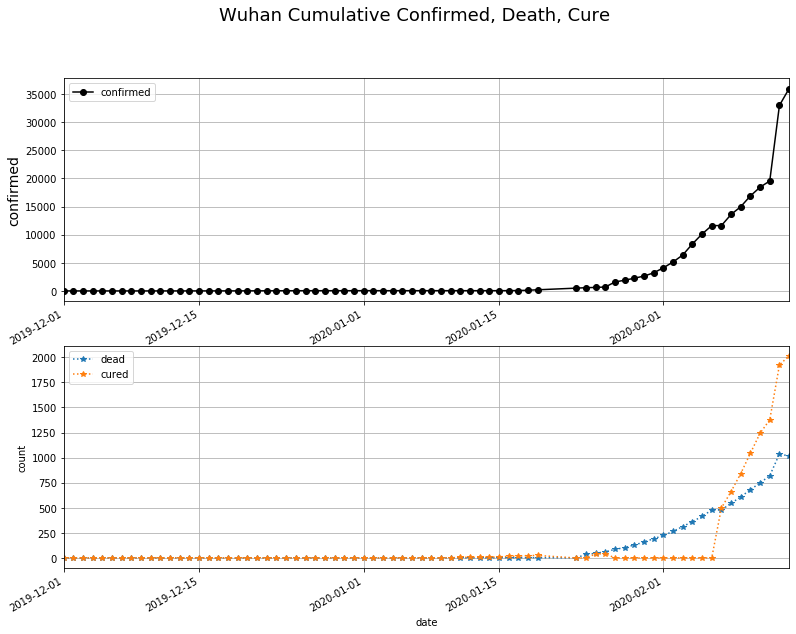

In [4]:
# Input City name or Province name
draw_city_trend("Wuhan", df) # city 

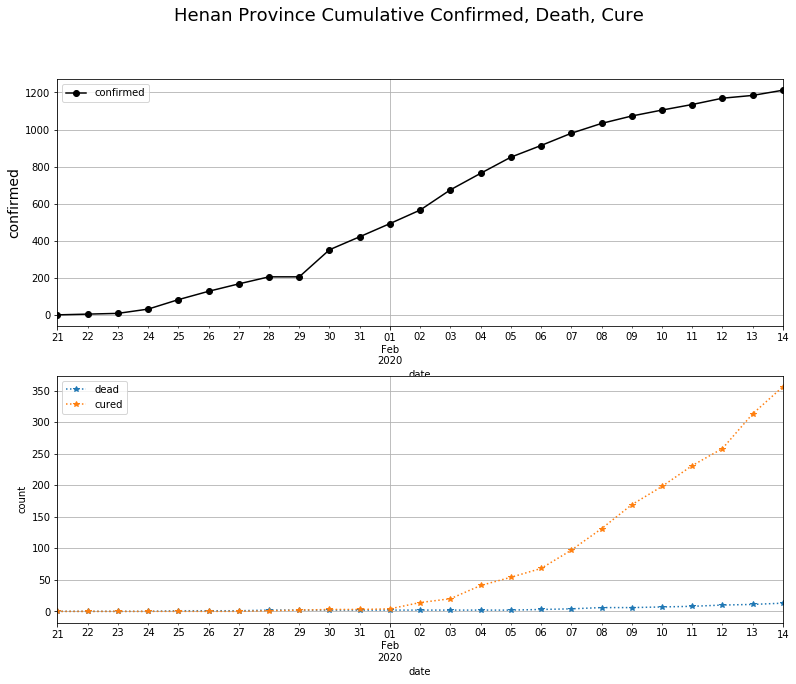

In [5]:
draw_province_trend("Henan Province", get_province_df(df, "Henan Province"))

## Polynomial regression

### Case1: Overall China

In [6]:
"""
Sum up all province within China
"""
# China total
China_df = df[df['date'] > datetime.datetime(2020, 1, 14)] 

China_total = get_China_total(China_df)

Train, Test = split_train_test_by_date(China_total, 5)

X_train = Train['Days']
y_train = Train['confirmed']
X_test =  Test['Days']
y_test = Test['confirmed']

Train dataset: data before 2020-02-09 00:00:00 
Test dataset: the last 5 days


In [7]:
China_total.tail(2)

,date,country,countryCode,province,city,confirmed,suspected,cured,dead,Days,net_confirmed
6781,2020-02-13,中国,CN,NaN,NaN,63932,10109,6728,1381,67,55823
7126,2020-02-14,中国,CN,NaN,NaN,66576,8969,8101,1524,68,56951


Degree 1:
RMSE of training set is 4885.418440669209
R2 score of training set is 0.833938703124608
MAPE of training set is 18.910553807068474

RMSE of test set is 20737.662270793957
R2 score of test set is -2.8210251461686626
MAPE of test set is 0.3442525765493401
---------------------------------------

Degree 3:
RMSE of training set is 609.8021206028701
R2 score of training set is 0.9974127240525348
MAPE of training set is 1.4641706809754294

RMSE of test set is 4855.305191650914
R2 score of test set is 0.7905437284977699
MAPE of test set is 0.08278748156088184
---------------------------------------

Degree 2:
RMSE of training set is 714.391310552416
R2 score of training set is 0.9964491100126346
MAPE of training set is 2.720045922496472

RMSE of test set is 3599.6117230878585
R2 score of test set is 0.8848744770054365
MAPE of test set is 0.06494507933032924
---------------------------------------



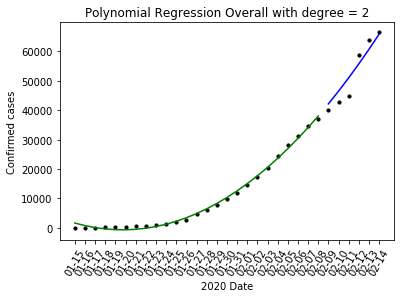

In [8]:
"""
Model selection:
  find optimal degree level
  Then draw plot using the optimal degree
"""
# select the best degree 
create_polynomial_regression_model(1, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Overall", China_total , X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Overall", China_total, X_train, X_test, y_train, y_test, draw_plot = True)

**based on the result above, we can clearly see that degree = 2 gives us best estimation. So now we use degree = 2 to predict the next 4 days**


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 1693.06827399849
R2 score of training set is 0.9931917578952363
MAPE of training set is 2.5405856366508424

---------------------------------------



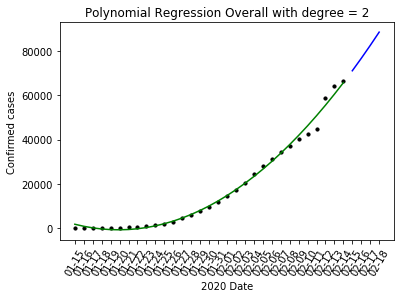

In [9]:
print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Overall", China_total)

### Case2: Each Province

Train dataset: data before 2020-02-09 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 3823.804102996427
R2 score of training set is 0.7997137255985216
MAPE of training set is 14.672227135174468

RMSE of test set is 19872.73019138965
R2 score of test set is -2.8779558818062294
MAPE of test set is 0.41111751038441685
---------------------------------------

Degree 3:
RMSE of training set is 461.5990719915726
R2 score of training set is 0.9970812978872243
MAPE of training set is 0.8032793738850621

RMSE of test set is 3912.173126848434
R2 score of test set is 0.8497121323473371
MAPE of test set is 0.09106538323142754
---------------------------------------

Degree 2:
RMSE of training set is 757.9536103946997
R2 score of training set is 0.9921305356841013
MAPE of training set is 3.1480360575304682

RMSE of test set is 5240.439996364492
R2 score of test set is 0.7303357985202203
MAPE of test set is 0.09793486589778543
---------------------------------------



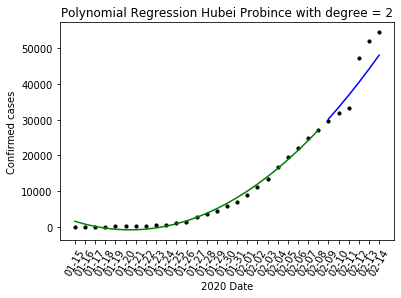


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 1972.6904445058933
R2 score of training set is 0.9852482948040427
MAPE of training set is 4.316644713953852

---------------------------------------



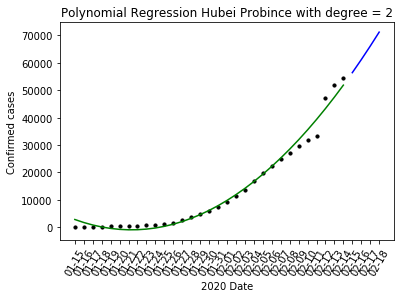

In [10]:
# See Hubei Province 
Hubei= get_province_df(China_df, "Hubei Province")
 
X_train, X_test, y_train, y_test = data_processing(Hubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Hubei Probince", Hubei, X_train, X_test, y_train, y_test, draw_plot = True)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Hubei Probince", Hubei)

### Case3: Ex-hubei Province

Train dataset: data before 2020-02-09 00:00:00 
Test dataset: the last 5 days
Degree 1:
RMSE of training set is 1127.8715659015575
R2 score of training set is 0.8958137912806436
MAPE of training set is inf

RMSE of test set is 1078.7762041320639
R2 score of test set is -2.9269788128015364
MAPE of test set is 0.0928299151171046
---------------------------------------

Degree 3:
RMSE of training set is 206.08833121510017
R2 score of training set is 0.9965214540574061
MAPE of training set is inf

RMSE of test set is 1654.561940081173
R2 score of test set is -8.237658474763073
MAPE of test set is 0.13112523560614078
---------------------------------------

Degree 2:
RMSE of training set is 308.10338490242503
R2 score of training set is 0.9922252957454877
MAPE of training set is inf

RMSE of test set is 3728.657637574009
R2 score of test set is -45.91382668572359
MAPE of test set is 0.2931774403382968
---------------------------------------



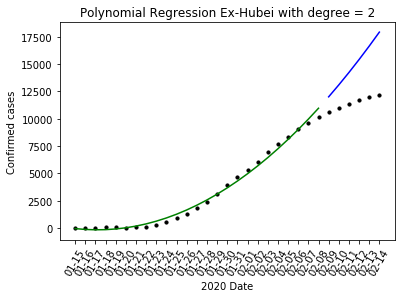

Degree 4:
RMSE of training set is 59.87618401053891
R2 score of training set is 0.9997063708504659
MAPE of training set is inf

RMSE of test set is 2405.1990102350605
R2 score of test set is -18.52081181537504
MAPE of test set is 0.1613597707294392
---------------------------------------

Degree 5:
RMSE of training set is 42.21159468940155
R2 score of training set is 0.9998540666818415
MAPE of training set is inf

RMSE of test set is 371.8432964423362
R2 score of test set is 0.5334311342878952
MAPE of test set is 0.023329052134583337
---------------------------------------


🍎Forescast the next 4 days
Degree 2:
RMSE of training set is 740.8926311882514
R2 score of training set is 0.9729506777963535
MAPE of training set is inf

---------------------------------------



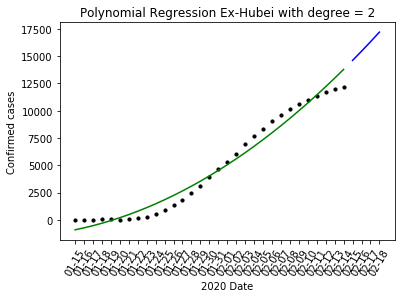

In [11]:
NotHubei = get_China_exclude_province(China_df, "Hubei Province")


X_train, X_test, y_train, y_test = data_processing(NotHubei, 5)    

# select the best degree 
create_polynomial_regression_model(1, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(3, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(2, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = True)
create_polynomial_regression_model(4, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)
create_polynomial_regression_model(5, "Ex-Hubei", NotHubei, X_train, X_test, y_train, y_test, draw_plot = False)

print("\n🍎Forescast the next 4 days")
forecast_next_4_days(2, "Ex-Hubei", NotHubei)